In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pklt
import seaborn as sns

In [116]:
# Loading the data
toyo = pd.read_csv('Toyota_Corolla.csv', encoding = "cp1252")

In [117]:
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [118]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [119]:
# Selecting the columns by using iloc method
toyo2=toyo.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [120]:
toyo2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [121]:
# Renaming the columns
toyo3=toyo2.rename({'Age_08_04':'Age','Quarterly_Tax':'QT','cc':'CC'},axis=1)

In [122]:
toyo3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [123]:
# Finding any duplicate data
toyo3[toyo3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [124]:
# Dropping duplicates
toyo4=toyo3.drop_duplicates().reset_index(drop=True)

In [125]:
toyo4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [126]:
toyo4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [127]:
toyo4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


# Correlation Matrix


In [128]:
toyo4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatter plots between variables along with histogram

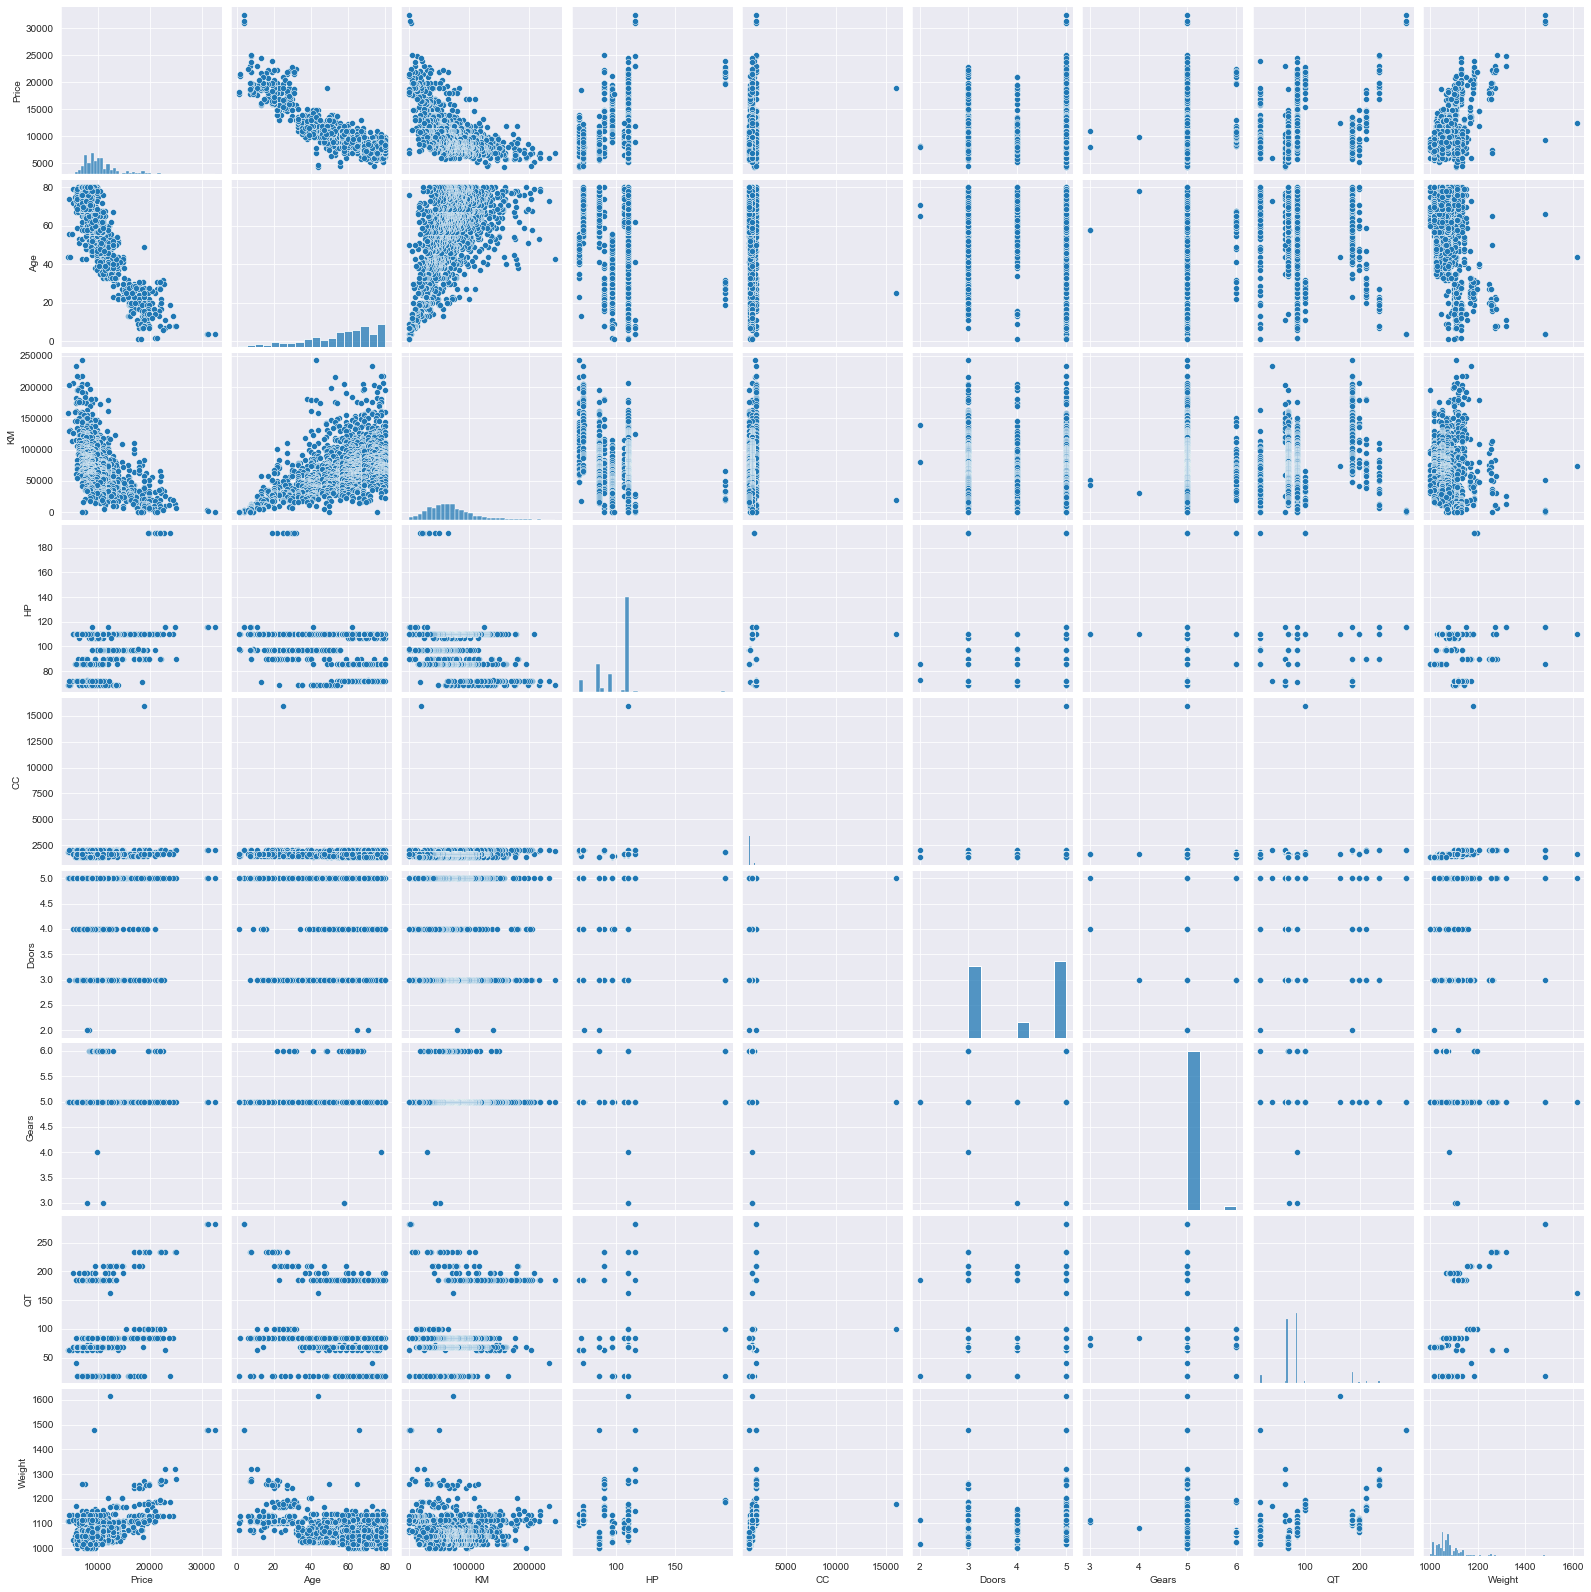

In [129]:
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

#  Preparing the model

In [130]:
# Building a model
import statsmodels.formula.api as smf

In [131]:
toyo4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [132]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:05:16   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# Finding Coefficient parameters
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [134]:
# p and t values
print(model1.pvalues)
print(model1.tvalues)

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [135]:
# Rsquared values
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [136]:
# As by seeing the model summary we can see that the probability value for  CC and Doors are more than 0.05, so we have to go 
# through linear regression for both CC and Doors for finding their t and p-values

### Simple linear regression model

In [137]:
m1_cc=smf.ols('Price~CC',data=toyo4).fit()

# p and t values
print(m1_cc.pvalues)                # p-value for CC is significant
print(m1_cc.tvalues)

Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64
Intercept    24.879592
CC            4.745039
dtype: float64


In [138]:
m1_doors=smf.ols('Price~Doors',data=toyo4).fit()

# p and t values
print(m1_doors.pvalues)            # p-value for Doors is significant
print(m1_doors.tvalues)

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64
Intercept    19.421546
Doors         7.070520
dtype: float64


In [139]:
# And combining the CC and Doors we get model
m1_cc_doors=smf.ols('Price~CC+Doors',data=toyo4).fit()

# p and t values
print(m1_cc_doors.pvalues)        # p-value for CC and Doors is significant
print(m1_cc_doors.tvalues)

Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64
Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64


# Model Validation

### Two Techniques 
### 1. Collinearity check & 2. Residual Analysis

In [140]:
toyo4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [141]:
# Collinearity Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

req_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_Age=1/(1-req_Age) 

req_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_KM=1/(1-req_KM) 

req_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_HP=1/(1-req_HP) 

req_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_CC=1/(1-req_CC)

req_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_Doors=1/(1-req_Doors) 

req_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_Gears=1/(1-req_Gears) 

req_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_QT=1/(1-req_QT) 

req_Weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo4).fit().rsquared
vif_Weight=1/(1-req_Weight) 

#storing VIF values in one dataframe
di={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif_values':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
vif_frame=pd.DataFrame(di)
vif_frame



,Variables,Vif_values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [142]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation.

### Residual Analysis

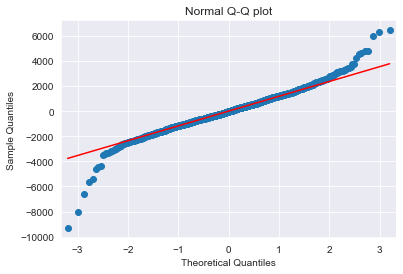

In [143]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

In [144]:
list(np.where(model1.resid>6000))  # outlier detection above the Q-Q plot

[array([109, 146, 522], dtype=int64)]

In [145]:
list(np.where(model1.resid<-6000))   # outlier detection below the Q-Q plot

[array([220, 600, 959], dtype=int64)]

#### Residual of Homoscedasticity

##### Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [146]:
import matplotlib.pyplot as plt

def get_standardised_values(vals):
    return (vals-vals.mean()/vals.std())

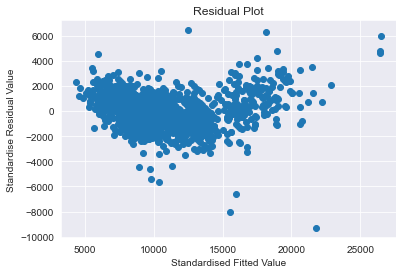

In [147]:
plt.scatter(get_standardised_values(model1.fittedvalues),
            get_standardised_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardised Fitted Value')
plt.ylabel('Standardise Residual Value')
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

### Residual VS Regressor

eval_env: 1


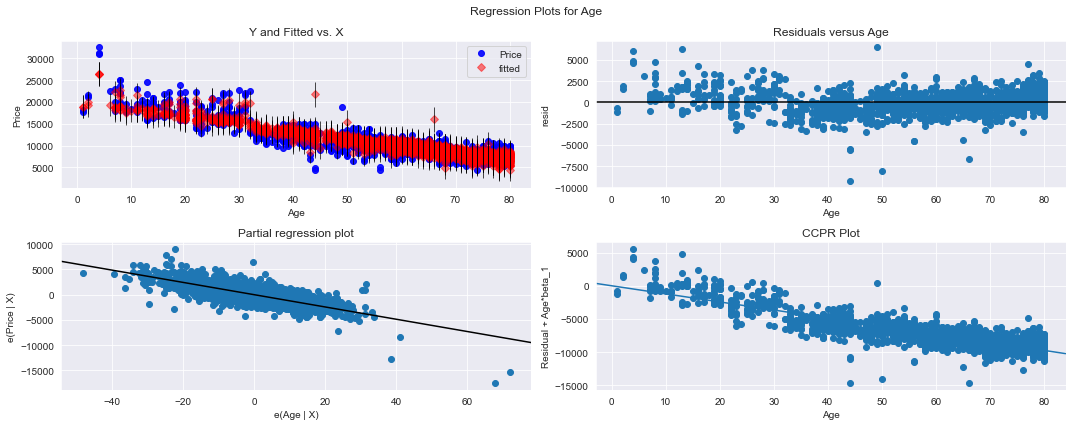

In [148]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'Age',fig=fig)
plt.show()

eval_env: 1


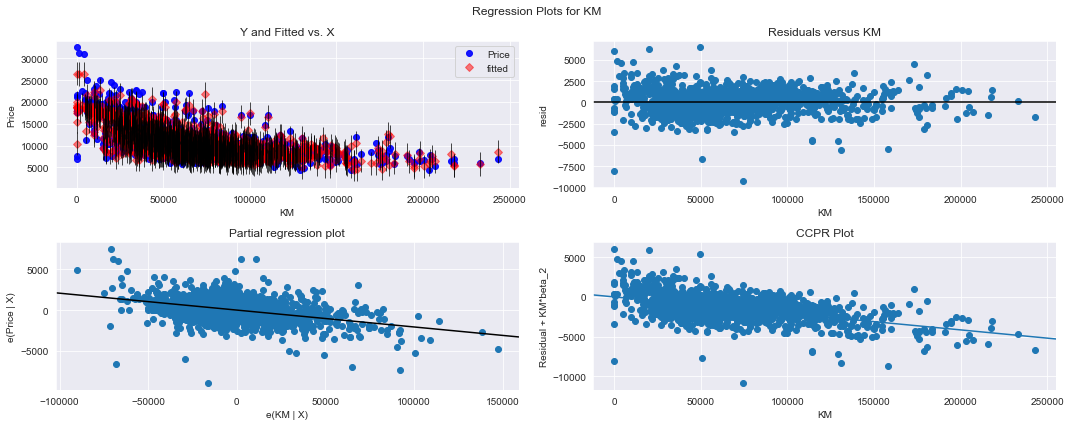

In [149]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'KM',fig=fig)
plt.show()

eval_env: 1


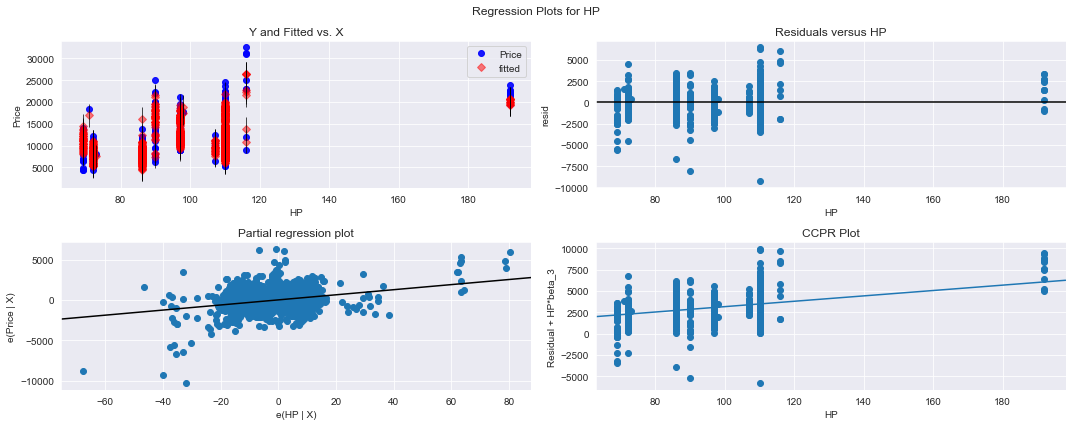

In [150]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'HP',fig=fig)
plt.show()

eval_env: 1


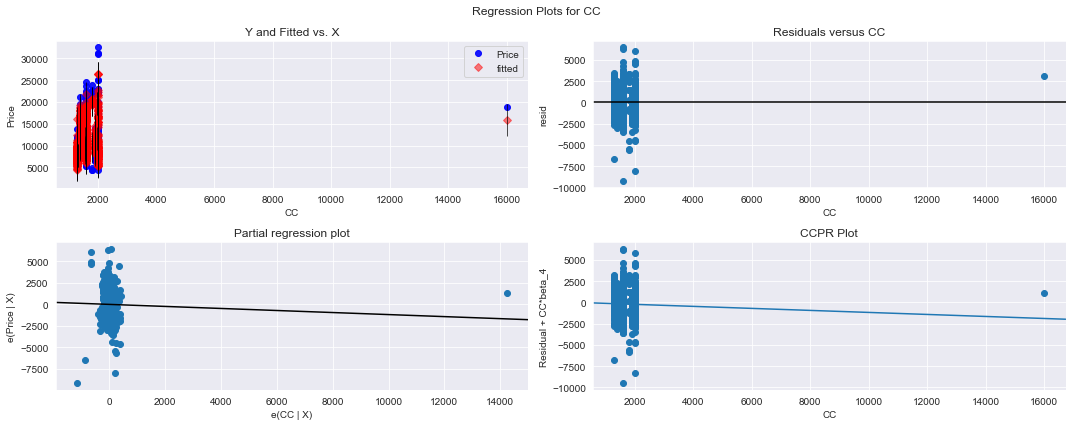

In [66]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'CC',fig=fig)
plt.show()

eval_env: 1


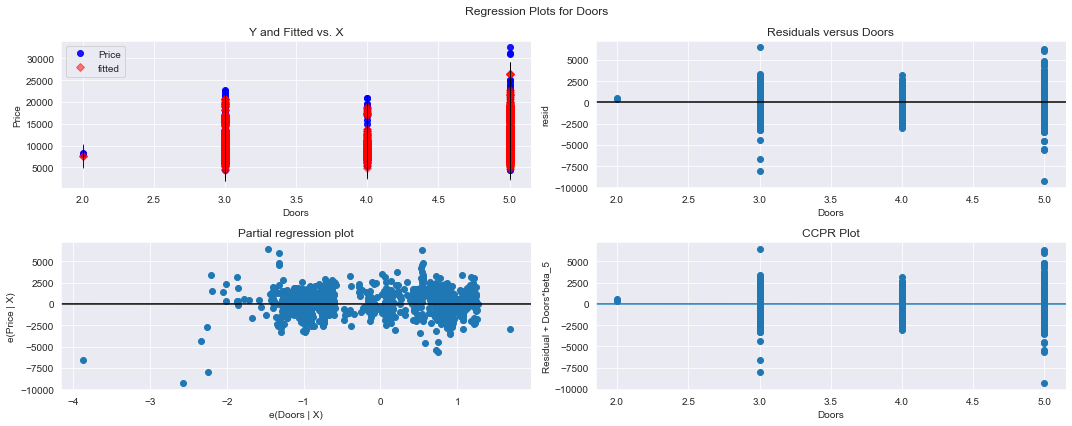

In [67]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'Doors',fig=fig)
plt.show()

eval_env: 1


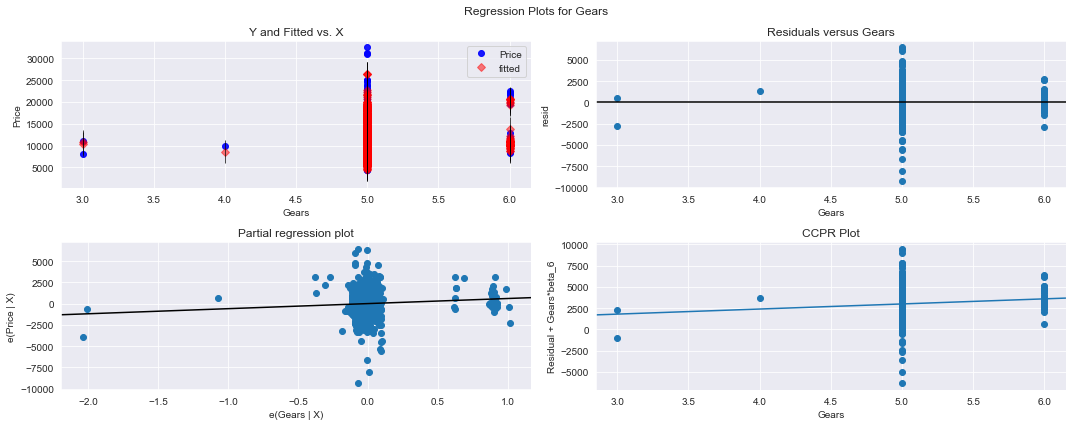

In [68]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'Gears',fig=fig)
plt.show()

eval_env: 1


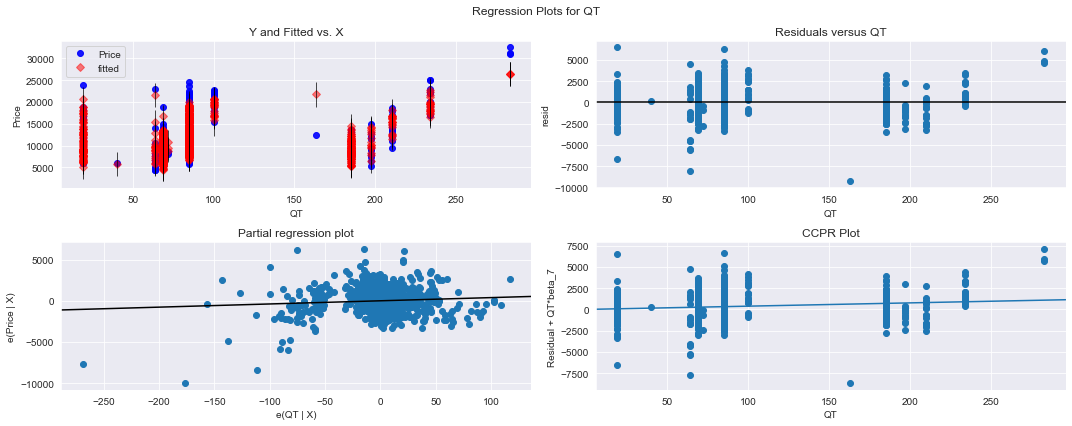

In [69]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'QT',fig=fig)
plt.show()

eval_env: 1


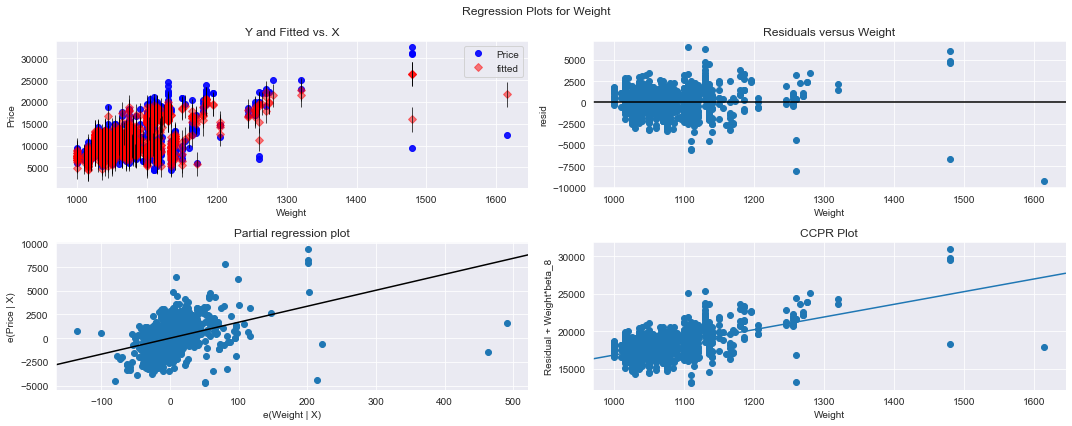

In [70]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model1,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [151]:
model1_influence=model1.get_influence()
(c,_)=model1_influence.cooks_distance

In [152]:
(c,_)

(array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
        8.04110550e-07, 6.99854767e-04, 1.08408002e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

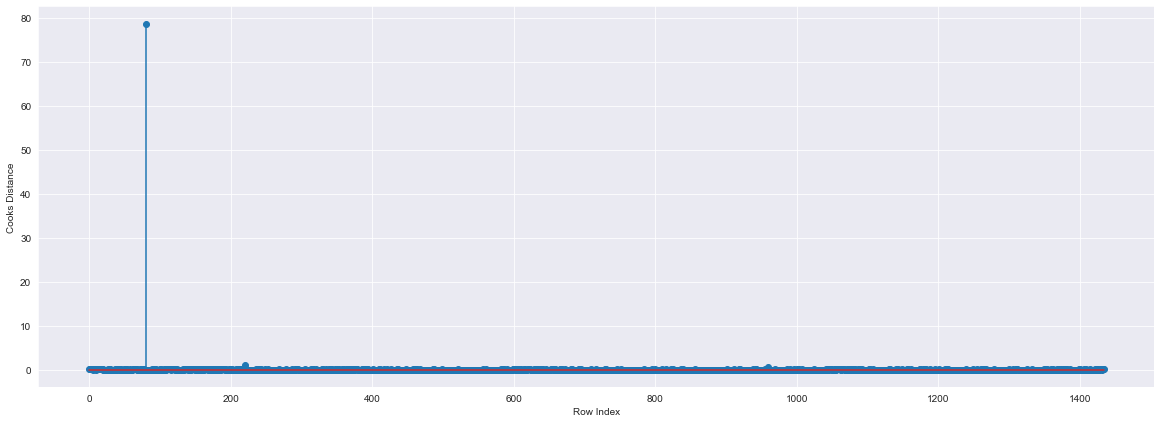

In [153]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
#index and value of influencer where value of c is more than 0.5
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

# High Influence Point

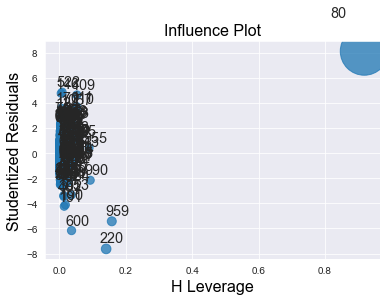

In [154]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [83]:
k=toyo4.shape[1]              # k is no. of columns in dataset
n=toyo4.shape[0]              # n is no. of datapoints in datasets
levergae_cutoff=3*((k+1)/n)

In [84]:
levergae_cutoff

0.020905923344947737

### From the above plot, it is evident that data point 80 are highly influencer

In [155]:
toyo4[toyo4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [156]:
toyo4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
# see the difference in range in QT and CC in other variables
# so it is necessary to improve the model1 by dropping certain rows

# Improving the Model 

In [157]:
#Discard the data points which are influencers and redesign the row number(reset_index()) 

toyo5=toyo4.drop(toyo4.index[[80]],axis=0).reset_index()

In [158]:
toyo5.head()

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [159]:
#Dropping the index column
toyo6=toyo5.drop('index',axis=1)

In [160]:
toyo6.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [161]:
toyo6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1434 non-null   int64
 1   Age     1434 non-null   int64
 2   KM      1434 non-null   int64
 3   HP      1434 non-null   int64
 4   CC      1434 non-null   int64
 5   Doors   1434 non-null   int64
 6   Gears   1434 non-null   int64
 7   QT      1434 non-null   int64
 8   Weight  1434 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


# Building a model2

In [94]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo6).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:19:20   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
# In order to get rid of preparing continue models and comparing their cook distance and again dropping different rows so,we can 
# def a function for and else.
while model1.rsquared<0.90:
    for c in [np.max(c)>0.5]:
        model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo6).fit()
        (c,_)=model1.get_influence().cooks_distance
        np.argmax(c),np.max(c)
        toyo6=toyo6.drop(toyo6.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo6
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo6).fit()
        final_model.rsquared,final_model.aic
        print('Thus model accuracy is improved to',final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [173]:
# Hence checking final model rsquared
final_model.rsquared

0.9003762532318559

In [174]:
toyo6

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Predictions

In [181]:
# say New data for prediction is
n_data=pd.DataFrame({'Age':22,'KM':24000,'HP':80,'CC':1300,'Doors':4,'Gears':5,'QT':70,'Weight':1150},index=[0])

In [182]:
n_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,22,24000,80,1300,4,5,70,1150


In [183]:
# Manual Prediction of Price
final_model.predict(n_data)

0    18654.857288
dtype: float64

In [184]:
# Automatic Prediction of Price with 90% accurcy
predict=final_model.predict(toyo6)

In [185]:
predict

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

# Table containing R^2 value for each prepared model

In [193]:
data={'No. of Models':['model1','final_model'],'R-squared_value':[model1.rsquared,final_model.rsquared]}

In [194]:
N_Data=pd.DataFrame(data)

In [195]:
N_Data

,No. of Models,R-squared_value
0,model1,0.900224
1,final_model,0.900376
